# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_letters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LettersIJL DS: 227 instances, 16 features


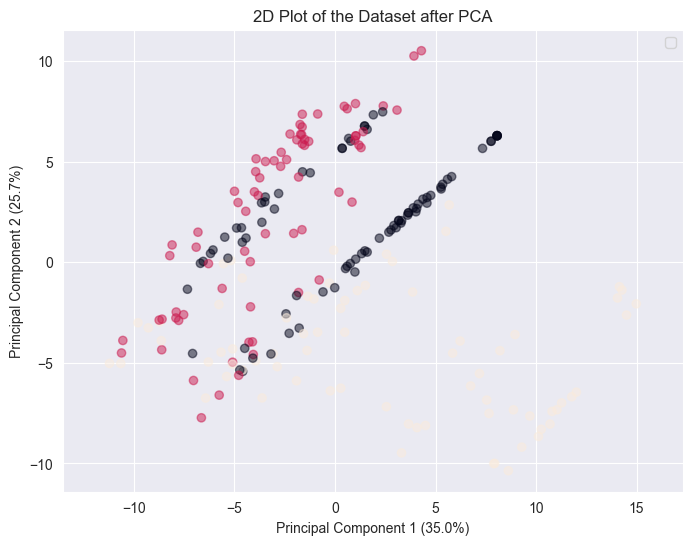

In [2]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"LettersIJL DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 4270.149129366722]
[2, 4162.600481889626]
[3, 4143.910723958546]
[4, 4137.938769105984]
[5, 4135.5027090947015]
[6, 4134.355544578969]
[7, 4133.768014445183]
[8, 4133.45137909443]
[9, 4133.274949958385]
[10, 4133.1742868645615]
[11, 4133.115805074122]
[12, 4133.081328151524]
[13, 4133.060747039156]
[14, 4133.048321870272]
[15, 4133.040739957315]
[16, 4133.036063908818]
[17, 4133.033148022492]
[18, 4133.031308236643]
[19, 4133.030132570628]
[20, 4133.02937087009]
[   0.         4133.02937087 4133.02937087]
[1, 4270.149129366721]
[2, 4162.600481889625]
[3, 4143.910723958547]
[4, 4137.938769105984]
[5, 4135.5027090947015]
[6, 4134.355544578969]
[7, 4133.768014445183]
[8, 4133.451379094429]
[9, 4133.274949958385]
[10, 4133.174286864562]
[11, 4133.115805074122]
[12, 4133.081328151525]
[13, 4133.060747039157]
[14, 4133.048321870272]
[15, 4133.040739957315]
[16, 4133.036063908818]
[17, 4133.033148022492]
[18, 4133.031308236643]
[19, 4133.030132570627]
[20, 4133.02937087009]
[1.00000000e+0

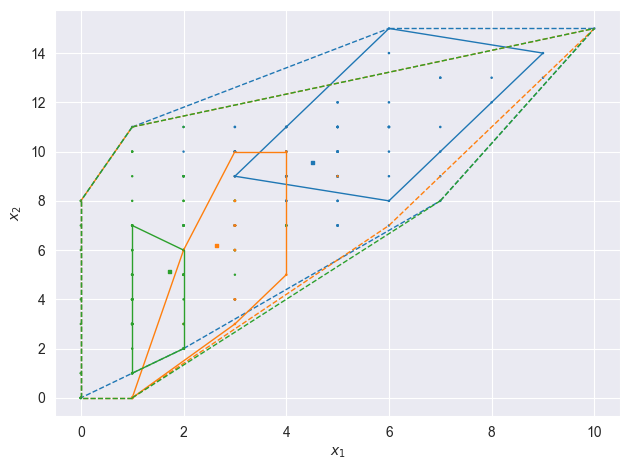

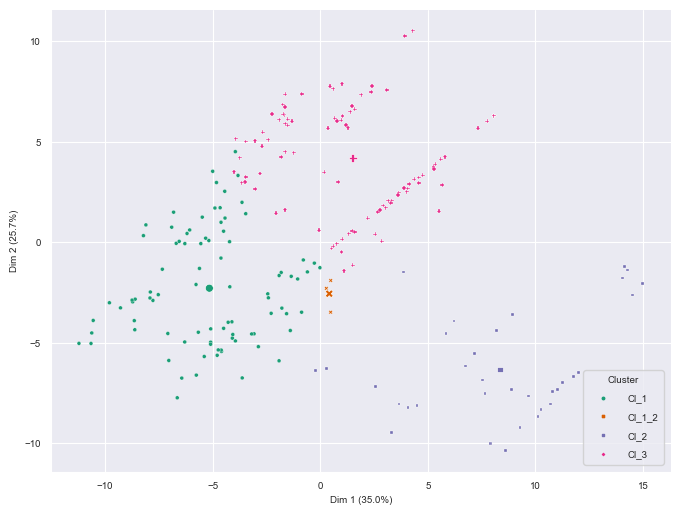

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.19515340295452677
Maximum Non-specificity value: 2.031583879739348
Minimum Non-specificity value: 0.9600059455540745
Average Non-specificity value: 1.4736189788708547


In [4]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=5)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

[1, 27.210186259923343]
[2, 24.255198841778213]
[3, 23.47175017279559]
[4, 23.32060947798572]
[5, 23.287147608501297]
[6, 23.27560204878994]
[7, 23.26891603206578]
[8, 23.263746446083367]
[9, 23.25934595794953]
[10, 23.25551176543912]
[11, 23.252166252979816]
[12, 23.24926197352895]
[13, 23.246758335521]
[14, 23.244615939805733]
[15, 23.242795735768823]
[16, 23.241259550148964]
[17, 23.239970910771817]
[18, 23.2388957828584]
[19, 23.238003087285055]
[ 0.         23.23800309 23.23800309]
[1, 15.384945536742428]
[2, 14.871666027497204]
[3, 14.786245819554996]
[4, 14.74585480288117]
[5, 14.720639325112145]
[6, 14.70416240623346]
[7, 14.693342932139384]
[8, 14.686216491481222]
[9, 14.681469734313495]
[10, 14.678241125345224]
[11, 14.675980874835467]
[12, 14.6743450609443]
[13, 14.673120417988931]
[14, 14.672174392138533]
[ 1.         14.67217439 14.67217439]
[1, 20.023208388115002]
[2, 19.15940599865919]
[3, 19.020325121394727]
[4, 18.976973330094822]
[5, 18.952022123645133]
[6, 18.9329931

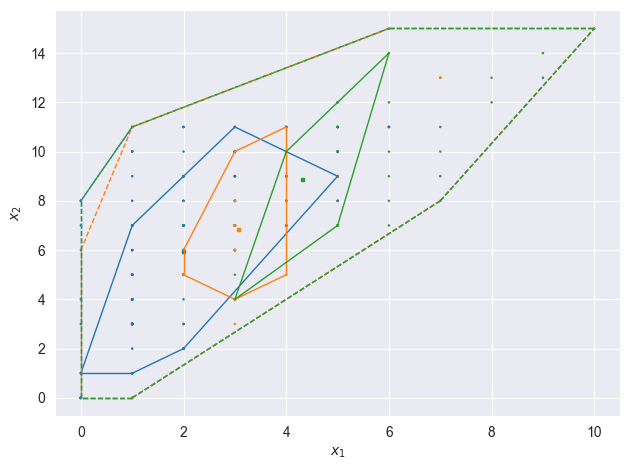

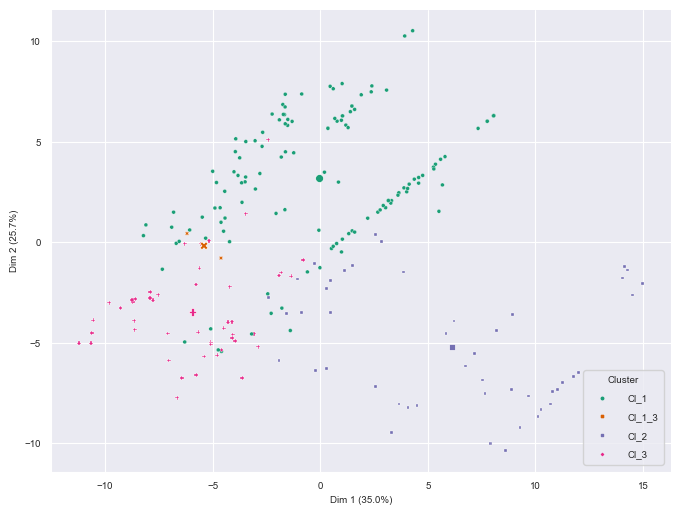

Weight matrix: 
 [[0.03545756 0.02097434 0.04008967 0.03622767 0.0117795  0.03548625
  0.07316826 0.05546193 0.12307608 0.023368   0.09301384 0.00783151
  0.18766796 0.10854052 0.06209995 0.08575695]
 [0.03275195 0.04730893 0.03965279 0.05752695 0.14502657 0.0785213
  0.01110601 0.0932922  0.00429956 0.01285788 0.17017108 0.01178332
  0.06377887 0.15740066 0.01910047 0.05542144]
 [0.03189436 0.0249946  0.01184819 0.01755078 0.12450645 0.03640036
  0.0129015  0.05003251 0.12970111 0.09670576 0.12581012 0.05885206
  0.00671457 0.15477736 0.00045071 0.11685958]]
Covariance Matrix 1: [ 2.26538275 11.6280281   4.30499031  5.65782461  1.68689438  4.10876938
  2.94343508  7.38965601  2.53936531  9.48292151  1.73340601  3.16945252
  0.30935078  0.7217781   1.58296996  0.52616279]
Covariance Matrix 2: [ 1.30867347  9.76615646  2.16666667  4.27636054  1.32653061  6.83758503
  2.16666667  4.15391156  2.40986395 12.15391156  0.875       4.91326531
  0.60629252  0.86819728  1.81377551  1.45833333]


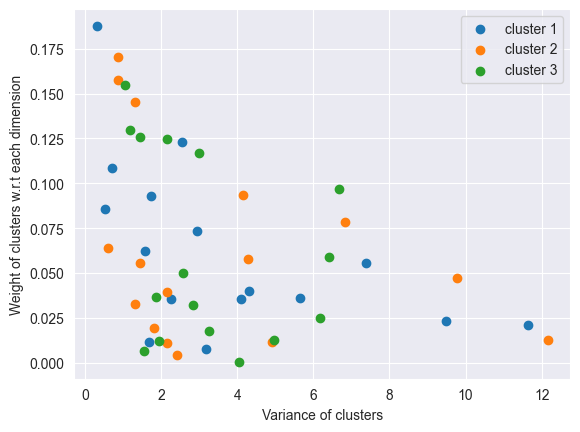

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.35208020576441906 - J value: 14.672174392138533
Maximum Non-specificity value: 2.096897841909256
Minimum Non-specificity value: 0.7520542211726857
Average Non-specificity value: 1.4224837935077372


In [6]:
# Feature weighted ECM clustering
c = 3
# W = np.random.dirichlet(np.ones(X.shape[1]), c)
model = fwecm(x=X, c=c, beta=2, alpha=1, delta=100, ntrials=5, epsi=1e-3)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Non-specificity equation
![test.png](assets/Non-specificity.png)